In [6]:
# Install necessary packages
!pip install opencv-python --quiet
!pip install matplotlib --quiet


In [7]:
import cv2
import matplotlib.pyplot as plt
import os


In [9]:
# URL to download the EDSR model (scaling factor x4)
#model_url = 'https://github.com/opencv/opencv_contrib/raw/master/modules/dnn_superres/samples/EDSR_x4.pb'

# Path to save the model
model_path = '/content/models/FSRCNN-small_x4.pb'

# Download the model if it doesn't exist
if not os.path.exists(model_path):
    import urllib.request
    print("Downloading EDSR_x4.pb model...")
    urllib.request.urlretrieve(model_url, model_path)
    print("Download complete.")
else:
    print("Super-resolution model already exists.")


Super-resolution model already exists.


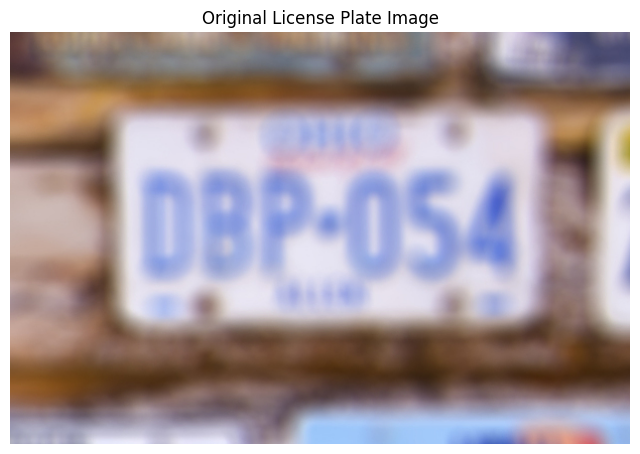

In [10]:
# Path to the input license plate image
image_path = '/content/c.jpg'  # Replace with your image path

# Check if the image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path '{image_path}' does not exist. Please provide a valid path.")

# Load the image using OpenCV
image = cv2.imread(image_path)

# Validate if the image was loaded successfully
if image is None:
    raise ValueError(f"Failed to load the image from '{image_path}'. Please check the file and try again.")

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title('Original License Plate Image')
plt.axis('off')
plt.show()


In [14]:
# Initialize the Super-Resolution model
sr = cv2.dnn_superres.DnnSuperResImpl_create()

# Read the pre-trained model
sr.readModel('/content/EDSR_x4.pb')

# Set the model and the upscaling factor
sr.setModel("edsr", 4)  # "edsr" with a scaling factor of 4

# Apply super-resolution to the image
sr_image = sr.upsample(image)

# Convert BGR to RGB for displaying
sr_image_rgb = cv2.cvtColor(sr_image, cv2.COLOR_BGR2RGB)


error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/tensorflow/tf_io.cpp:42: error: (-2:Unspecified error) FAILED: ReadProtoFromBinaryFile(param_file, param). Failed to parse GraphDef file: /content/EDSR_x4.pb in function 'ReadTFNetParamsFromBinaryFileOrDie'


In [ ]:
# Display the super-resolved image
plt.figure(figsize=(8, 6))
plt.imshow(sr_image_rgb)
plt.title('Super-Resolved License Plate Image')
plt.axis('off')
plt.show()

# Compare Original and Super-Resolved Images Side by Side
plt.figure(figsize=(16, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Super-Resolved Image
plt.subplot(1, 2, 2)
plt.imshow(sr_image_rgb)
plt.title('Super-Resolved Image')
plt.axis('off')

plt.show()

# Path to save the super-resolved image
output_path = 'super_resolved_license_plate.jpg'  # You can change the filename and extension as needed

# Save the super-resolved image using OpenCV (convert RGB back to BGR)
sr_image_bgr = cv2.cvtColor(sr_image_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite(output_path, sr_image_bgr)

print(f"Super-resolved image saved to '{output_path}'")


In [3]:
!pip install ISR


  Using cached ISR-2.2.0-py3-none-any.whl.metadata (1.5 kB)
INFO: pip is looking at multiple versions of isr to determine which version is compatible with other requirements. This could take a while.
  Using cached ISR-2.1.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached ISR-2.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached Keras-2.2.4-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached numpy-1.16.2.zip (5.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached ISR-2.0.5-py3-none-any.whl.metadata (1.4 kB)
  Using cached ISR-2.0.2-py3-none-any.whl.metadata (1.3 kB)
  Using cached ISR-2.0.1-py3-none-any.whl.metadata (1.3 kB)
  Using cached ISR-2.0.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached ISR-1.9.3-py3-none-any.whl.metadata (1.3 kB)
INFO: pip is still looking at multiple versions of isr to determine which version is compatible with other requirements. This could take a while.
  Using cached ISR-1.9.2-py3-none-any.whl.metadata (2.0 kB)
  Using cached ISR-1.9.1-py3

In [2]:
from ISR.models import RRDN
import cv2
import matplotlib.pyplot as plt
import os

# Initialize the RRDN model
rrdn = RRDN(weights='gans')  # You can choose 'gans' or 'psnr'

# Path to the input license plate image
image_path = '/content/c.jpg'  # Replace with your image path

# Check if the image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path '{image_path}' does not exist. Please provide a valid path.")

# Load the image
image = cv2.imread(image_path)

# Validate if the image was loaded successfully
if image is None:
    raise ValueError(f"Failed to load the image from '{image_path}'. Please check the file and try again.")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title('Original License Plate Image')
plt.axis('off')
plt.show()

# Apply super-resolution
sr_image = rrdn.predict(image)

# Convert BGR to RGB for displaying
sr_image_rgb = cv2.cvtColor(sr_image, cv2.COLOR_BGR2RGB)

# Display the super-resolved image
plt.figure(figsize=(8, 6))
plt.imshow(sr_image_rgb)
plt.title('Super-Resolved License Plate Image with ISR')
plt.axis('off')
plt.show()

# Save the super-resolved image
output_path = 'super_resolved_license_plate_isr.jpg'
cv2.imwrite(output_path, sr_image)
print(f"Super-resolved image saved to '{output_path}'")


ModuleNotFoundError: No module named 'ISR'

In [1]:
!pip install opencv-python --quiet

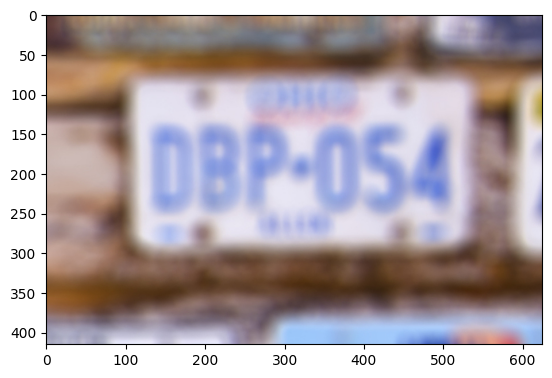

error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/tensorflow/tf_io.cpp:42: error: (-2:Unspecified error) FAILED: ReadProtoFromBinaryFile(param_file, param). Failed to parse GraphDef file: /content/EDSR_x4.pb in function 'ReadTFNetParamsFromBinaryFileOrDie'


In [3]:
import cv2
import matplotlib.pyplot as plt
# Read image
img = cv2.imread("/content/c.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/EDSR_x4.pb"

sr.readModel(path)

sr.setModel("edsr",4)

result = sr.upsample(img)

# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()

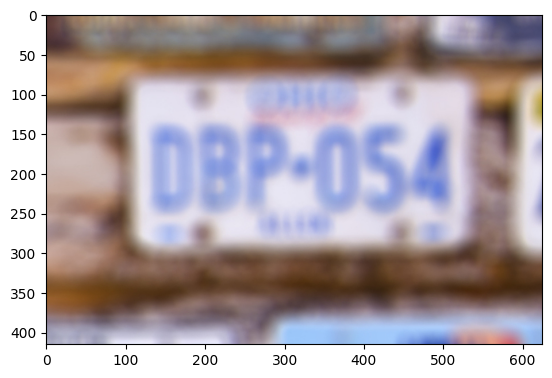

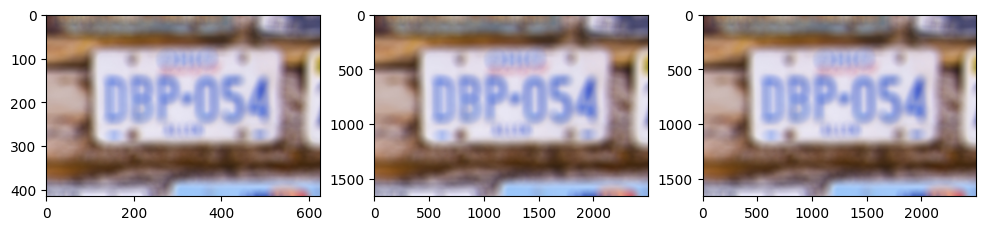

In [2]:
import cv2
import matplotlib.pyplot as plt
# Read image
img = cv2.imread("/content/c.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/ESPCN_x4.pb"

sr.readModel(path)

sr.setModel("espcn",4)

result = sr.upsample(img)

# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()

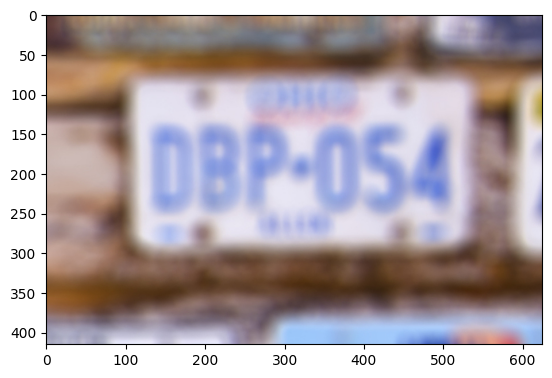

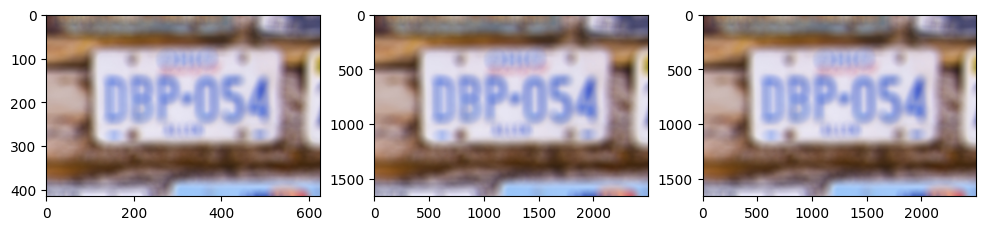

In [4]:
import cv2
import matplotlib.pyplot as plt
# Read image
img = cv2.imread("/content/c.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/FSRCNN-small_x4.pb"

sr.readModel(path)

sr.setModel("fsrcnn",4)

result = sr.upsample(img)

# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()